# SGM figure 2

In [1]:
%load_ext autoreload
%autoreload 1
from pkg.gmp import quadratic_assignment
from pkg.gmp import quadratic_assignment_ot
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 1

import sys
sys.path
sys.path.insert(0,'../../graspologic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Caption:
Average match ratio $\pm$ 2 s.e. as a function of number of seeds $m$ for differenct correlation values $\rho$ in $\rho$-SBM simulations on $n=300 nodes.


In [84]:
from graspologic.simulations import sbm_corr
import random
import sys
from joblib import Parallel, delayed
from scipy.stats import sem
from sklearn.utils import check_random_state

n = 300
m = range(21)
rhos = [0.9, 0.6, 0.3]
ratios = np.zeros((len(m), 11))
error = np.zeros((len(m), 11))
n_per_block = 100
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
directed = False
loops = False
n_realizations = 100
def match_ratio(perm):
    return np.mean(perm == np.arange(len(perm)))

np.random.seed(8888)
for k in range(len(rhos)):
    rho = rhos[k]
    for i in m:

        def run_sim(seed):
            A1, A2 = sbm_corr(
                block_members, block_probs, rho, directed=directed, loops=loops
            )

            W1 = np.sort(random.sample(list(range(n)), i))
            W1 = W1.astype(int)
            partial_match = np.column_stack((W1, W1))
            options={'maximize':True,'tol':1e-9,'maxiter':100,'partial_match':partial_match,'shuffle_input':True, 'reg': 100, 'thr':1e-2,}
            res = quadratic_assignment_ot(A1,A2,options=options)
            return match_ratio(res.col_ind)
        
        rng = check_random_state(k)
        seeds = rng.randint(np.iinfo(np.int32).max, size=n_realizations)
#         seeds = np.random.choice(int(1e8), size=n_realizations, replace=False)
        outs = Parallel(n_jobs=-1)(delayed(run_sim)(seed) for seed in seeds)
        ratios[i, k] = np.mean(outs)
        error[i,k] = sem(outs)



In [99]:
from graspologic.simulations import sbm_corr
import random
import sys
from joblib import Parallel, delayed
from scipy.stats import sem
from sklearn.utils import check_random_state

n = 300
m = range(21)
# rhos = 0.1 * np.arange(11)[3:]
rhos = [0.9, 0.6, 0.3]
ratios2 = np.zeros((len(m), 11))
error2 = np.zeros((len(m), 11))
n_per_block = 100
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
directed = False
loops = False
n_realizations = 100
def match_ratio(perm):
    return np.mean(perm == np.arange(len(perm)))

np.random.seed(8888)
for k in range(len(rhos)):
    rho = rhos[k]
    for i in m:

        def run_sim(seed):
            A1, A2 = sbm_corr(
                block_members, block_probs, rho, directed=directed, loops=loops
            )

            W1 = np.sort(random.sample(list(range(n)), i))
            W1 = W1.astype(int)
            partial_match = np.column_stack((W1, W1))
            options={'maximize':True,'tol':1e-9,'maxiter':100,'partial_match':partial_match,'shuffle_input':True, 'rng':seed}
            res = quadratic_assignment(A1,A2,options=options)
            return match_ratio(res.col_ind)
        
        rng = check_random_state(k)
        seeds = rng.randint(np.iinfo(np.int32).max, size=n_realizations)
#         seeds = np.random.choice(int(1e8), size=n_realizations, replace=False)
        outs = Parallel(n_jobs=-1)(delayed(run_sim)(seed) for seed in seeds)
        ratios2[i, k] = np.mean(outs)
        error2[i,k] = sem(outs)

Text(0.5, 1.0, '$\\rho$ = 0.9')

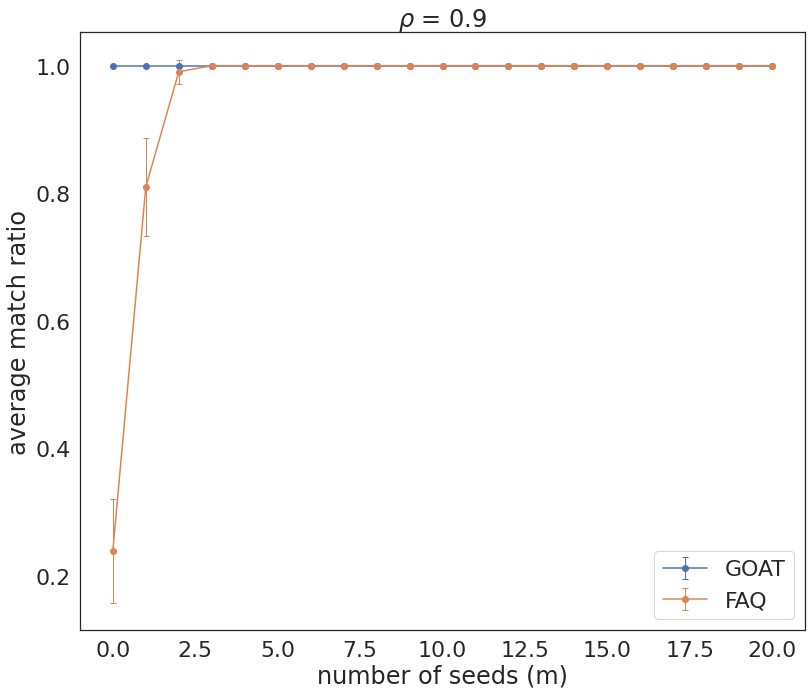

In [139]:
# -2
sns.set_context('poster')
sns.set(rc={'figure.figsize':(13,11)})
sns.set(font_scale = 2)
sns.set_style('white')
i = 0
plt.errorbar(m,ratios[:, i], 2*error[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label='GOAT')
plt.errorbar(m,ratios2[:, i], 2*error2[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label='FAQ')
plt.legend()
plt.xlabel("number of seeds (m)")
plt.ylabel("average match ratio")
plt.title(fr'$\rho$ = {rhos[i]}')

Text(0.5, 1.0, '$\\rho$ = 0.6')

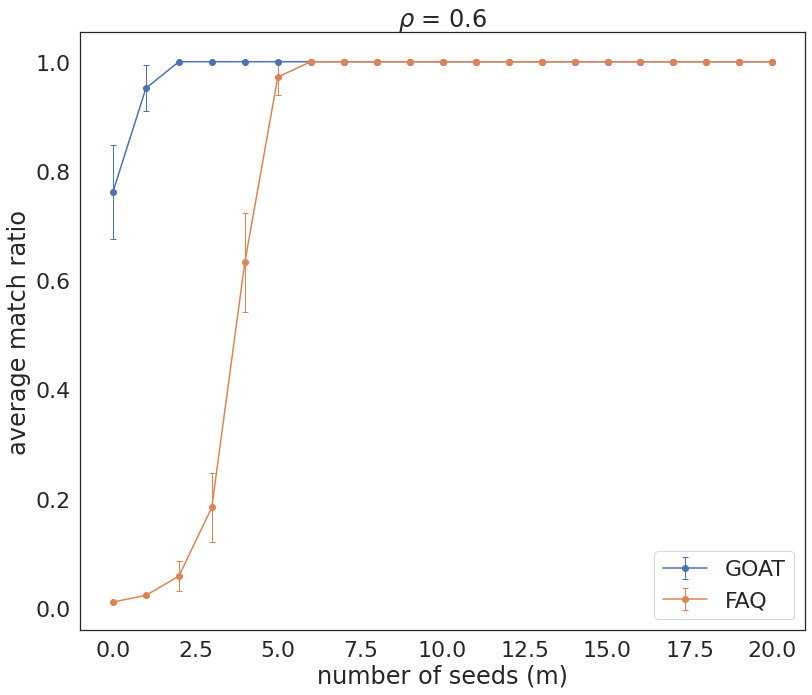

In [138]:
i = 1
sns.set(font_scale = 2)
sns.set_style('white')
plt.errorbar(m,ratios[:, i], 2*error[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label='GOAT')
plt.errorbar(m,ratios2[:, i], 2*error2[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label='FAQ')

plt.legend()
plt.xlabel("number of seeds (m)")
plt.ylabel("average match ratio")
plt.title(fr'$\rho$ = {np.around(rhos[i],2)}')

Text(0.5, 1.0, '$\\rho$ = 0.3')

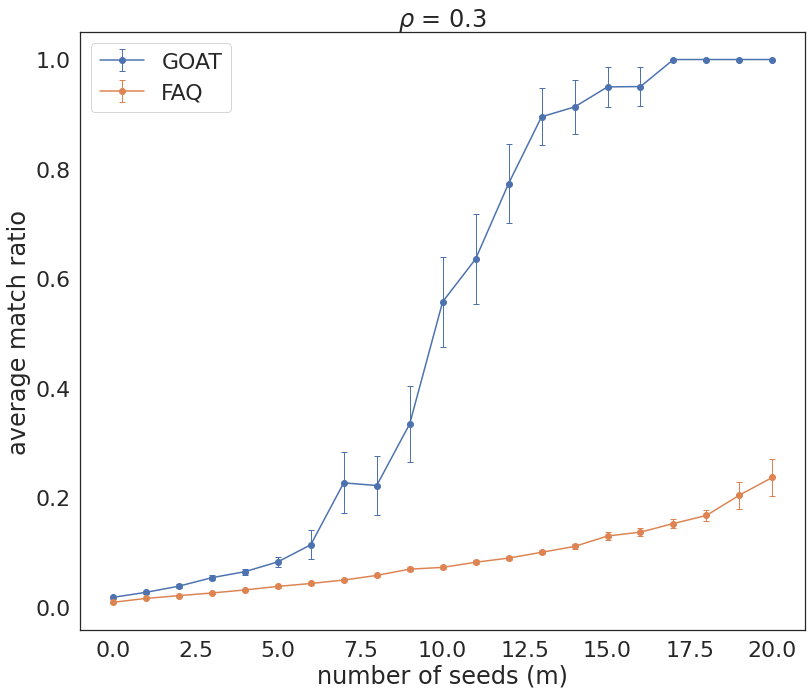

In [140]:
i =2
# sns.set_context('poster')
# sns.set(font_scale = 2)
# sns.set(rc={'figure.figsize':(12,9)})
# sns.set_style('white')
plt.errorbar(m,ratios[:, i], 2*error[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label='GOAT')
plt.errorbar(m,ratios2[:, i], 2*error2[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label='FAQ')

plt.legend()
plt.xlabel("number of seeds (m)")
plt.ylabel("average match ratio")
plt.title(fr'$\rho$ = {np.around(rhos[i],2)}')

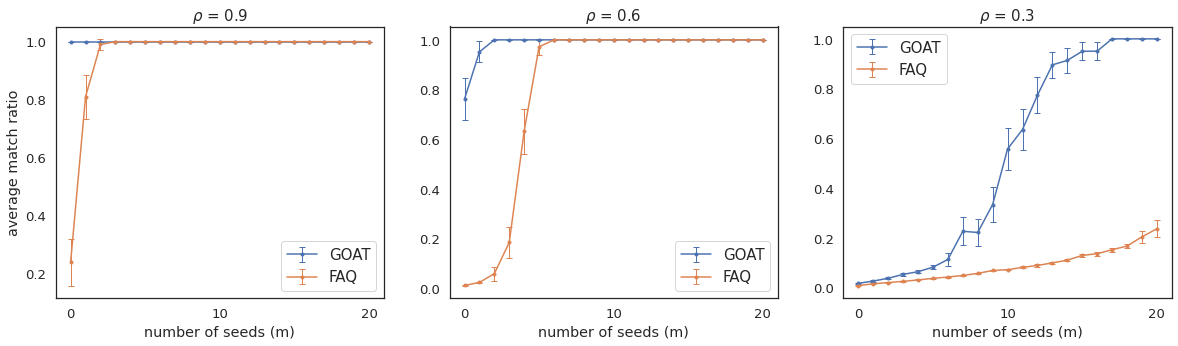

In [171]:
# sns.set(rc={'figure.figsize':(5,9)})
sns.set(font_scale = 1.2)
sns.set_style('white')
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_ylabel("average match ratio")
for i in range(3):
    sns.set(font_scale = 2)
    sns.set_style('white')
    axes[i].errorbar(m,ratios[:, i], 2*error[:, i], fmt='.-',capsize=3, elinewidth=1, markeredgewidth=1, label='GOAT')
    axes[i].errorbar(m,ratios2[:, i], 2*error2[:, i],fmt='.-',capsize=3, elinewidth=1, markeredgewidth=1, label='FAQ')
    axes[i].legend(prop={'size': 15})
    axes[i].set_title(fr'$\rho$ = {np.around(rhos[i],2)}', fontsize=15)
    axes[i].set_xlabel("number of seeds (m)")
    
plt.savefig('sgm.png')